# EDA - Feature Engineering, N-Grams, POS Tags and Bivariate Analysis on Fiorela Dataset


EDA: https://www.analyticsvidhya.com/blog/2020/04/beginners-guide-exploratory-data-analysis-text-data/


In [ ]:
# import libraries 
!pip install install nltk
!pip install sklearn
!pip install textblob
import nltk
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import plotly.graph_objs as go
% matplotlib inline
import plotly as py 
import cufflinks as cf 
from plotly.offline import iplot
py.offline.init_notebook_mode(connected=True)
cf.go_offline()
import matplotlib.pyplot as plt
% matplotlib inline
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
#Start by connecting gdrive into the google colab
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# import csv file
# change file path 
data = pd.read_csv('/content/gdrive/MyDrive/Depression Project/DepressionDataFinal2Processed.csv')
# read first 5 lines of data
data.head()

,Id,Text,Target
0,2.850000e+17,one thing love life mother one ever come mine,1
1,2.900000e+17,want perfect want happy,0
2,2.860000e+17,mom hates dad hates today sucks fword life tho,0
3,2.860000e+17,hate hate life,0
4,2.860000e+17,feel good,1


In [ ]:
data.columns

Index(['Id', 'Text', 'Target'], dtype='object')

In [ ]:
# number of null value 
data.isnull().sum()

Id         0
Text      13
Target     0
dtype: int64

In [ ]:
data.dropna(inplace=True)
data.isnull().sum()

Id        0
Text      0
Target    0
dtype: int64

In [ ]:
# filter depressed text 
depressed = data[data['Target']==0]
for index,text in enumerate(depressed["Text"][1:5]):
  print('Tweet %d:\n'%(index+1),text)

Tweet 1:
 mom hates dad hates today sucks fword life tho
Tweet 2:
 hate hate life
Tweet 3:
 2013 want happy
Tweet 4:
 15factsaboutme wish could go back ti ame change life


In [ ]:
# filter not depressed text 
notdepressed = data[data['Target']==1]
for index,text in enumerate(notdepressed["Text"][1:5]):
  print('Tweet %d:\n'%(index+1),text)

Tweet 1:
 feel good
Tweet 2:
 “ single want tf
Tweet 3:
 love life live life
Tweet 4:
 spoiled life


In [ ]:
# find number of characters in every depressed text including spaces 
depressed['Text_len']=depressed['Text'].apply(lambda x: len(x))

In [ ]:
#number of words in every depressed text
depressed['Text_count']=depressed['Text'].apply(lambda x:  len(x.split()))

In [ ]:
# average word lenght of each text 
# how many character/word on average 
def get_avg_word_len(x):
    words = x.split()
    word_len = 0
    for word in words:
        # need to calculate len(word) word by word to 
        # exclude spaces 
        word_len = word_len + len(word)
    return word_len/len(words)

In [ ]:
depressed['avg_word_len'] = depressed['Text'].apply(lambda x: get_avg_word_len(x))

In [ ]:
depressed.head()

,Id,Text,Target,Text_len,Text_count,avg_word_len
1,2.900000e+17,want perfect want happy,0,23,4,5.000000
2,2.860000e+17,mom hates dad hates today sucks fword life tho,0,46,9,4.222222
3,2.860000e+17,hate hate life,0,14,3,4.000000
7,2.860000e+17,2013 want happy,0,15,3,4.333333
11,2.850000e+17,15factsaboutme wish could go back ti ame chang...,0,52,9,4.888889


In [ ]:
depressed.shape

(4102, 6)

In [ ]:
# find number of characters in every not depressed text  
notdepressed['Text_len']=notdepressed['Text'].apply(lambda x: len(x))

In [ ]:
#number of words in every not depressed text
notdepressed['Text_count']=notdepressed['Text'].apply(lambda x:  len(x.split()))

In [ ]:
# average word lenght of each text 
# how many character/word on average 
def get_avg_word_len(x):
    words = x.split()
    word_len = 0
    for word in words:
        # need to calculate len(word) word by word to 
        # exclude spaces 
        word_len = word_len + len(word)
    return word_len/len(words)

In [ ]:
notdepressed['avg_word_len'] = notdepressed['Text'].apply(lambda x: get_avg_word_len(x))
notdepressed.sort_values (by= ['avg_word_len'], inplace=True, ascending=False)

In [ ]:
notdepressed.head()

,Id,Text,Target,Text_len,Text_count,avg_word_len
8741,2.850000e+17,‚äúxoxbrianaoxo mentionsomeoneamazing pretty a...,1,52,4,12.25
3282,2.850000e+17,i truly blessed üçåüçéüçç‚òäüåñüóªüè•üôè,1,47,4,11.00
1477,2.860000e+17,victorious,1,10,1,10.00
2357,2.900000e+17,lovemylife,1,10,1,10.00
417,2.850000e+17,victorious,1,10,1,10.00


In [ ]:
notdepressed.shape

(4700, 6)

### Feature Engineering

In [ ]:
data['Text_len']=data['Text'].apply(lambda x: len(x))
data['Text_count']=data['Text'].apply(lambda x:  len(x.split()))
data['avg_word_len'] = data['Text'].apply(lambda x: get_avg_word_len(x))

Text(0.5, 1.0, 'Average Text Length Distribution in Depressed Text')

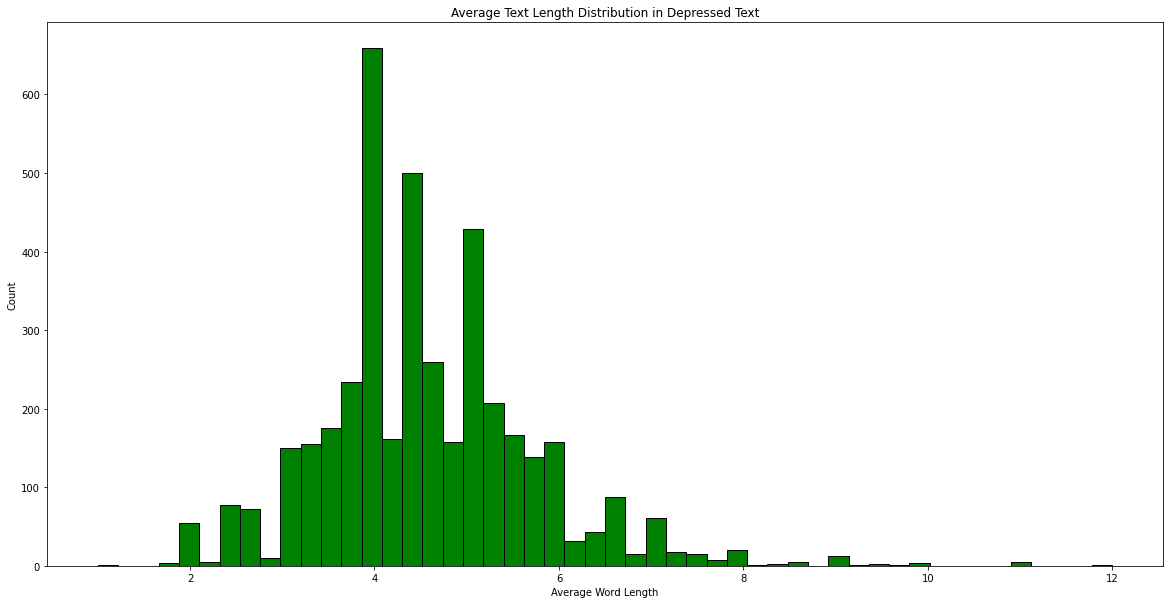

In [ ]:
# plot histogram 
plt.figure(figsize=(20,10))
depressed['avg_word_len'].plot(kind = 'hist', color = 'green', bins =50,  edgecolor='black')
plt.xlabel("Average Word Length")
plt.ylabel("Count")
plt.title("Average Text Length Distribution in Depressed Text")

Text(0.5, 1.0, 'Text Count per tweet in Depressed Text')

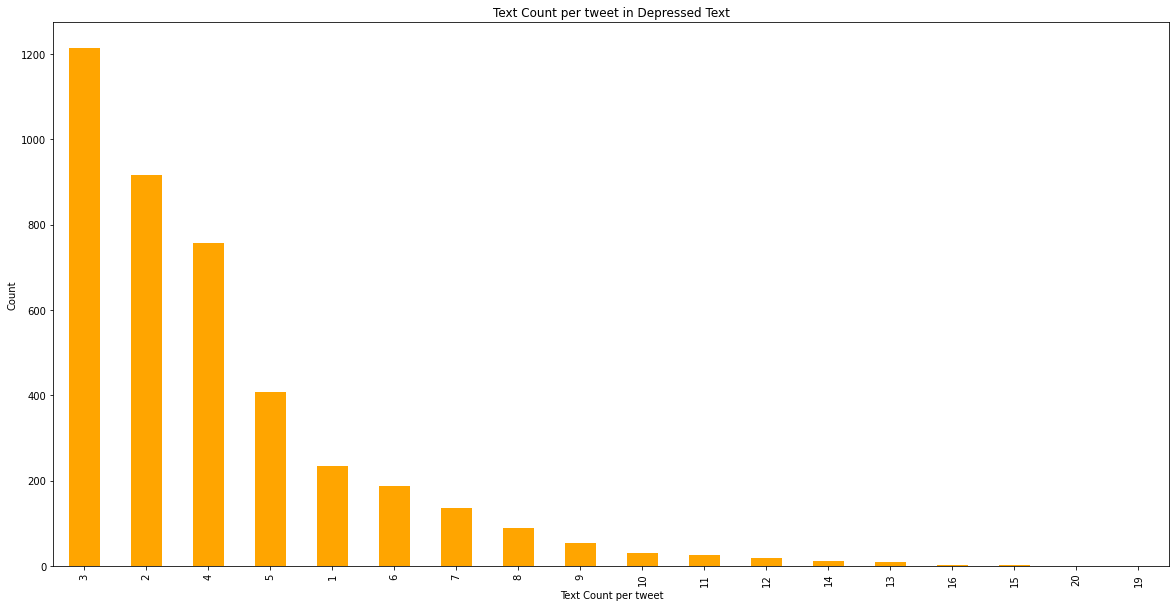

In [ ]:
# plot bar graph
plt.figure(figsize=(20,10))
depressed["Text_count"].value_counts().plot(kind = 'bar', color = 'orange')
plt.xlabel("Text Count per tweet")
plt.ylabel("Count")
plt.title("Text Count per tweet in Depressed Text")

In [ ]:
notdepressed.shape

(4700, 6)

Text(0.5, 1.0, 'Average Text Length Distribution in not Depressed Text')

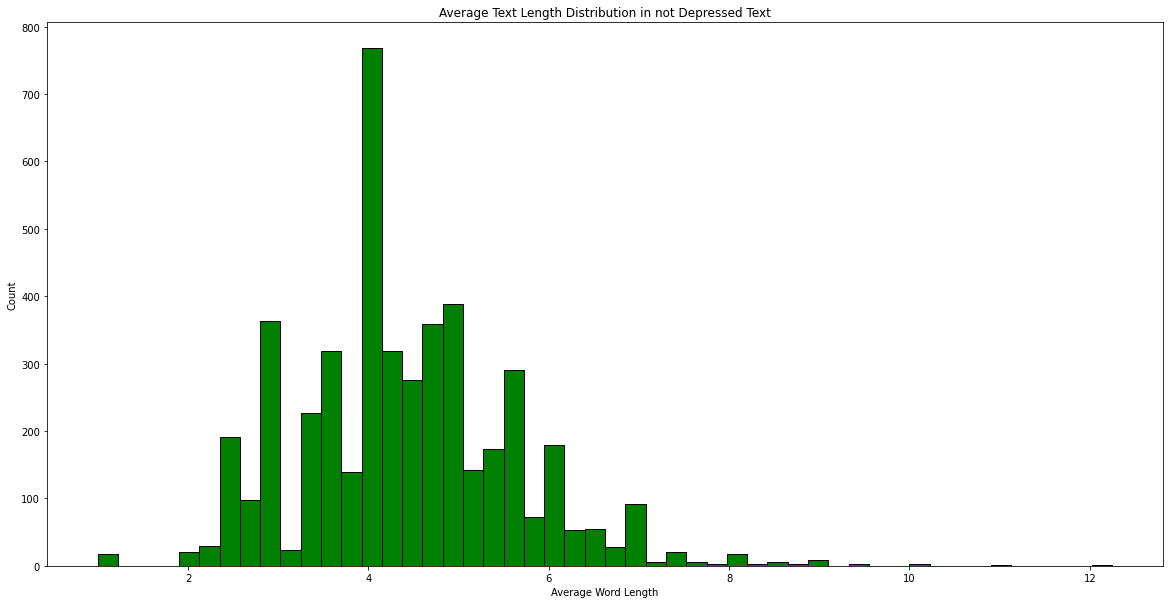

In [ ]:
plt.figure(figsize=(20,10))
notdepressed['avg_word_len'].plot(kind = 'hist', color = 'green', bins =50, edgecolor='black')
plt.xlabel("Average Word Length")
plt.ylabel("Count")
plt.title("Average Text Length Distribution in not Depressed Text")

Text(0.5, 1.0, 'Text Count per tweet in not Depressed Text')

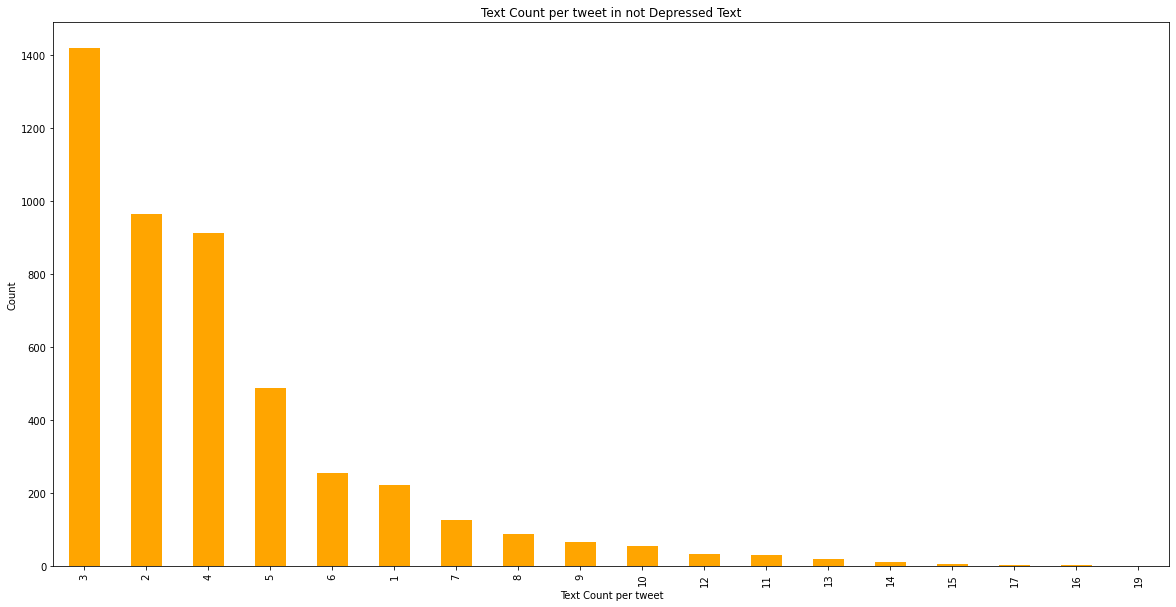

In [ ]:
plt.figure(figsize=(20,10))
notdepressed["Text_count"].value_counts().plot(kind = 'bar', color = 'orange')
plt.xlabel("Text Count per tweet")
plt.ylabel("Count")
plt.title("Text Count per tweet in not Depressed Text")

# Distribution of Unigram, Bigram and Trigram

In [ ]:
#get frequency of the words using bow (bag of words)
def get_top_n_words(x,n):
    vec = CountVectorizer().fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis = 0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:n]

In [ ]:
depwords = get_top_n_words(depressed["Text"], 20)

In [ ]:
notdepwords = get_top_n_words(notdepressed["Text"], 20)

Text(0.5, 1.0, 'Top 20 words in depressed dataset - UNIGRAM')

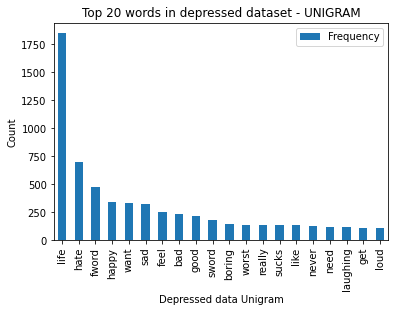

In [ ]:
# bar chart of the top 20 most freuquency used words in depressed text 
depressed1 = pd.DataFrame(depwords, columns = ['Unigram', 'Frequency'])
depressed1= depressed1.set_index('Unigram')
depressed1.plot(kind='bar')
plt.xlabel("Depressed data Unigram")
plt.ylabel("Count")
plt.title("Top 20 words in depressed dataset - UNIGRAM")

Text(0.5, 1.0, 'Top 20 words in not depressed dataset - UNIGRAM')

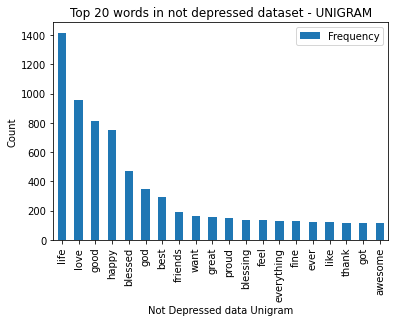

In [ ]:
depressed1 = pd.DataFrame(notdepwords, columns = ['Unigram', 'Frequency'])
depressed1= depressed1.set_index('Unigram')
depressed1.plot(kind='bar')
plt.xlabel("Not Depressed data Unigram")
plt.ylabel("Count")
plt.title("Top 20 words in not depressed dataset - UNIGRAM")

In [ ]:
# bigram 
def get_top_n_words_bigram(x,n):
    vec = CountVectorizer(ngram_range=(2,2)).fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis = 0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:n]

In [ ]:
bidepwords = get_top_n_words_bigram(depressed["Text"], 20)

In [ ]:
binotdepwords = get_top_n_words_bigram(notdepressed["Text"], 20)

Text(0.5, 1.0, 'Top 20 words in depressed dataset - BIGRAM')

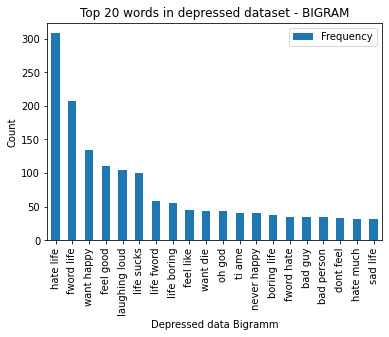

In [ ]:
# bar chart of the top 20 most freuquency used words in depressed text 
depressed2 = pd.DataFrame(bidepwords, columns = ['Bigram', 'Frequency'])
depressed2= depressed2.set_index('Bigram')
depressed2.plot(kind='bar')
plt.xlabel("Depressed data Bigramm")
plt.ylabel("Count")
plt.title("Top 20 words in depressed dataset - BIGRAM")


Text(0.5, 1.0, 'Top 20 words in not depressed dataset - BIGRAM')

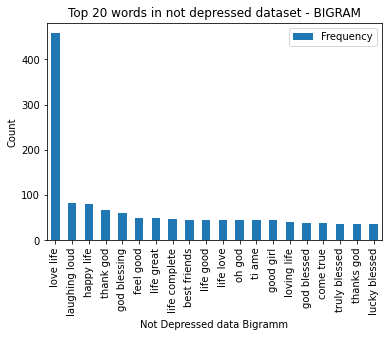

In [ ]:
depressed2 = pd.DataFrame(binotdepwords, columns = ['Bigram', 'Frequency'])
depressed2= depressed2.set_index('Bigram')
depressed2.plot(kind='bar')
plt.xlabel("Not Depressed data Bigramm")
plt.ylabel("Count")
plt.title("Top 20 words in not depressed dataset - BIGRAM")

In [ ]:
# trigram 
def get_top_n_words_trigram(x,n):
    vec = CountVectorizer(ngram_range=(3,3)).fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis = 0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:n]

In [ ]:
tridepwords = get_top_n_words_trigram(depressed["Text"], 20)

In [ ]:
trinotdepwords = get_top_n_words_trigram(notdepressed["Text"], 20)

Text(0.5, 1.0, 'Top 20 words in not depressed dataset - TRIGRAM')

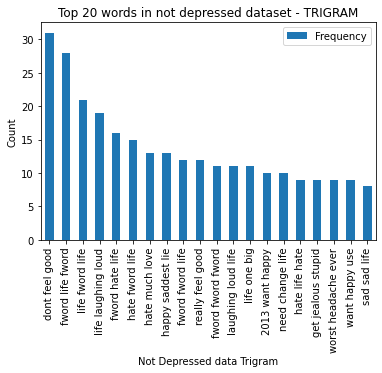

In [ ]:
# bar chart of the top 20 most freuquency used words in depressed text 
depressed3 = pd.DataFrame(tridepwords, columns = ['Trigram', 'Frequency'])
depressed3= depressed3.set_index('Trigram')
depressed3.plot(kind='bar')
plt.xlabel("Not Depressed data Trigram")
plt.ylabel("Count")
plt.title("Top 20 words in not depressed dataset - TRIGRAM")

Text(0.5, 1.0, 'Top 20 words in not depressed dataset - TRIGRAM')

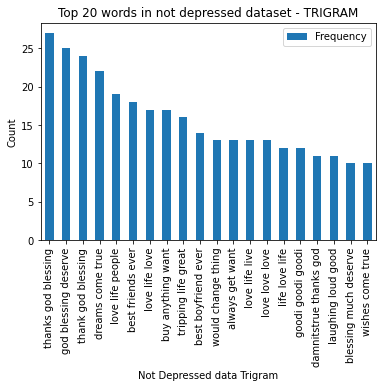

In [ ]:
depressed3 = pd.DataFrame(trinotdepwords, columns = ['Trigram', 'Frequency'])
depressed3= depressed3.set_index('Trigram')
depressed3.plot(kind='bar')
plt.xlabel("Not Depressed data Trigram")
plt.ylabel("Count")
plt.title("Top 20 words in not depressed dataset - TRIGRAM")


# Part Of Speech Tagging 

In [ ]:
blobdepressed = TextBlob(str(depressed["Text"]))
blobnotdepressed= TextBlob(str(notdepressed["Text"]))

In [ ]:
import nltk
nltk.download('tagsets')

[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.


True

In [ ]:
# help page with all the tags and meanings
print(nltk.help.upenn_tagset())

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
posdepdata = pd.DataFrame(blobdepressed.tags, columns =['words', 'pos'] )
posdepdata = posdepdata['pos'].value_counts()
posdepdata

NN     21
CD     13
JJ      6
VBP     3
NNS     3
NNP     2
VBD     2
RB      2
MD      1
VBZ     1
VB      1
JJS     1
Name: pos, dtype: int64

In [ ]:
posnotdepdata = pd.DataFrame(blobnotdepressed.tags, columns =['words', 'pos'] )
posnotdepdata = posnotdepdata['pos'].value_counts()
posnotdepdata

CD     11
NN     10
JJ      4
RB      2
DT      1
VBG     1
NNP     1
IN      1
VBD     1
Name: pos, dtype: int64

Text(0.5, 1.0, 'POS tags in depressed dataset')

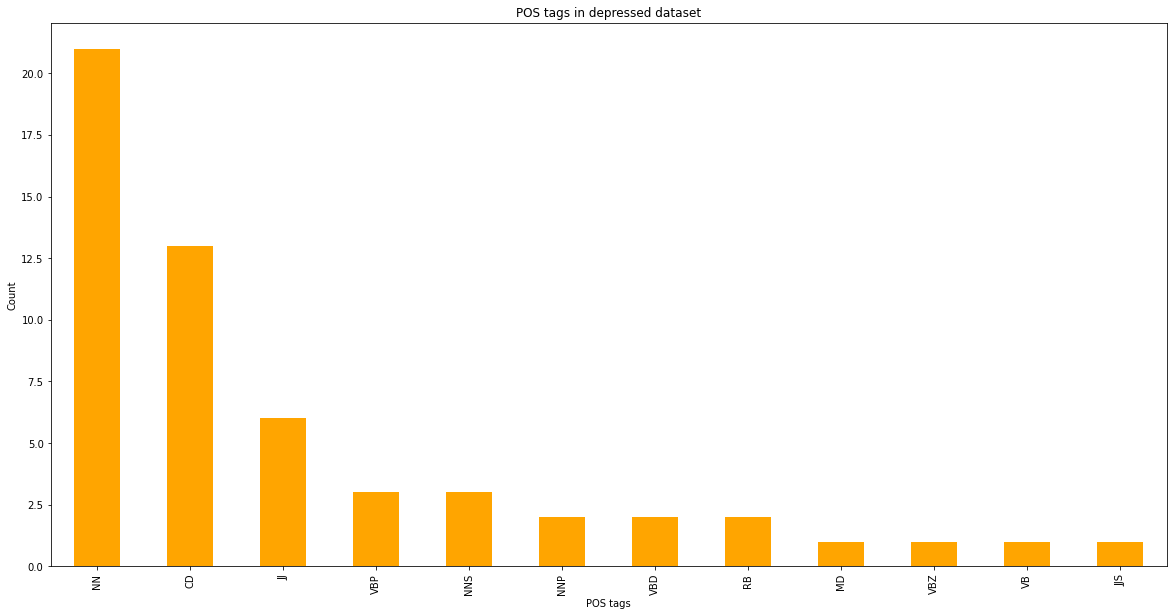

In [ ]:
plt.figure(figsize=(20, 10))
posdepdata.plot(kind = 'bar', color ='orange')
plt.xlabel("POS tags")
plt.ylabel("Count")
plt.title("POS tags in depressed dataset")

Text(0.5, 1.0, 'POS tags in not depressed dataset')

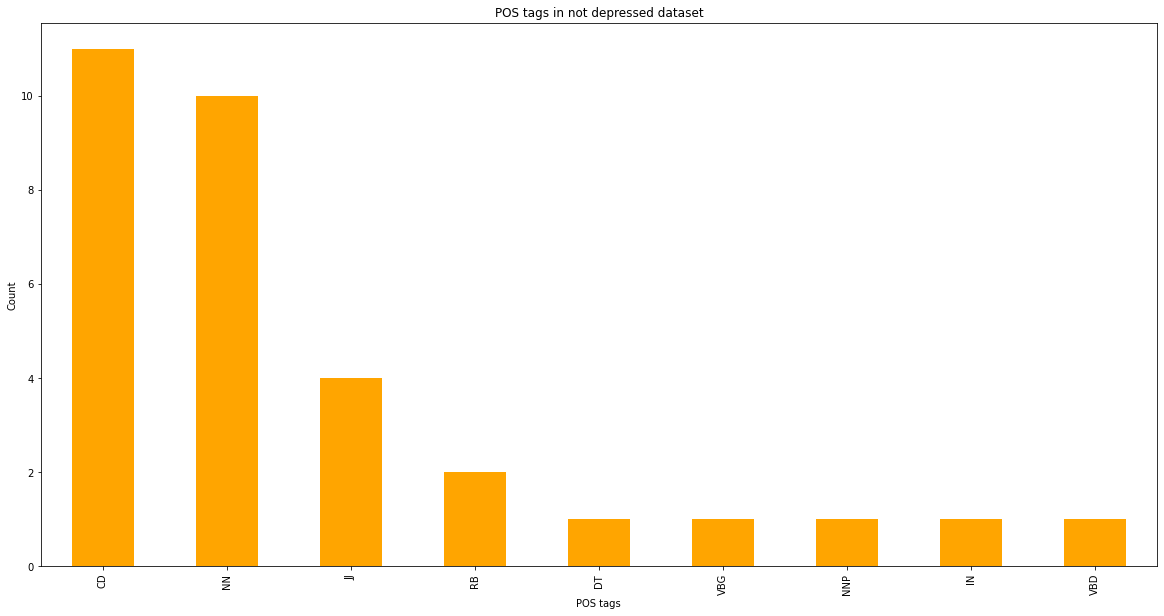

In [ ]:
plt.figure(figsize=(20, 10))
posnotdepdata.plot(kind = 'bar', color ='orange')
plt.xlabel("POS tags")
plt.ylabel("Count")
plt.title("POS tags in not depressed dataset")

# Bivariate Analysis - Finding Correlations 

In [ ]:
data.head

<bound method NDFrame.head of                 Id  ... avg_word_len
0     2.850000e+17  ...     4.111111
1     2.900000e+17  ...     5.000000
2     2.860000e+17  ...     4.222222
3     2.860000e+17  ...     4.000000
4     2.860000e+17  ...     4.000000
...            ...  ...          ...
8810  2.900000e+17  ...     4.666667
8811  2.900000e+17  ...     4.250000
8812  2.850000e+17  ...     3.333333
8813  2.900000e+17  ...     6.500000
8814  2.900000e+17  ...     5.500000

[8802 rows x 6 columns]>

In [ ]:
data.columns

Index(['Id', 'Text', 'Target', 'Text_len', 'Text_count', 'avg_word_len'], dtype='object')

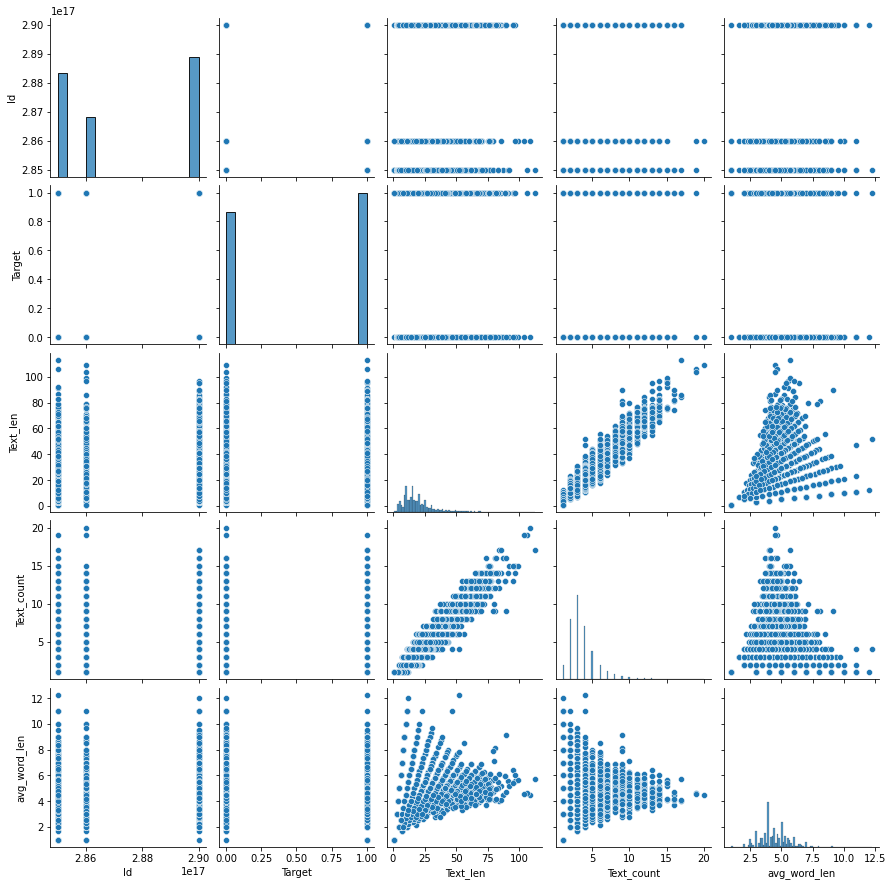

In [ ]:
sns.pairplot(data)

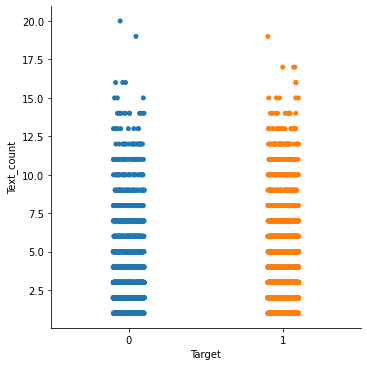

In [ ]:
sns.catplot(x='Target', y='Text_count', data=data)

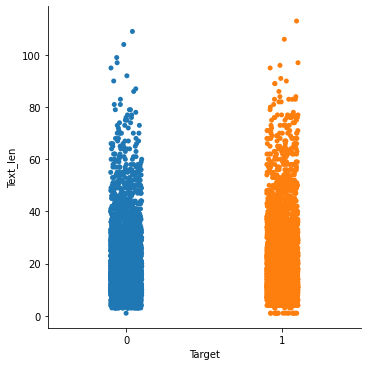

In [ ]:
sns.catplot(x='Target', y='Text_len', data=data)

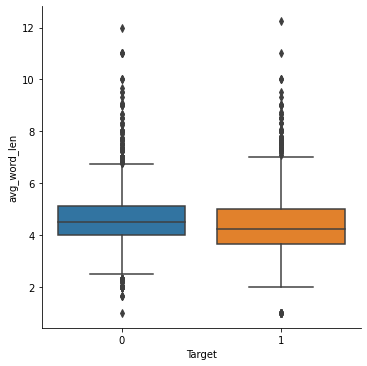

In [ ]:
sns.catplot(x='Target', y='avg_word_len', data=data, kind = 'box')

In [ ]:
from __future__ import absolute_import
from plotly.graph_objs import *
from plotly.offline import iplot
import plotly.graph_objs as go


In [ ]:
x0 = data[data['Target']==0]['Text_len']
x1 = data[data['Target']==1][ 'Text_len']

In [ ]:
trace0 = go.Histogram(x=x0, name = 'Depressed', opacity = 0.5)
trace1 = go.Histogram(x=x1, name = 'Not Depressed', opacity = 0.5)

In [ ]:
def enable_plotly_in_cell():
  import IPython
  from plotly.offline import init_notebook_mode
  display(IPython.core.display.HTML('''<script src="/static/components/requirejs/require.js"></script>'''))
  init_notebook_mode(connected=False)

enable_plotly_in_cell()
data = [trace0, trace1]
layout = go.Layout(barmode = 'relative', title = 'Distribution of avg Text Length (number of characters)')
fig = go.Figure(data = data, layout = layout)
iplot(fig)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
x1 = depressed[ 'avg_word_len']
trace2 = go.Histogram(x=x0, name = 'Depressed', opacity = 0.5)

In [ ]:
enable_plotly_in_cell()
data = [trace2]
layout = go.Layout(barmode = 'relative', title = 'avg word len in depressed text')
fig = go.Figure(data = data, layout = layout)
iplot(fig)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
x2 = depressed['avg_word_len']
x3 = notdepressed[ 'avg_word_len']

In [ ]:
trace3 = go.Histogram(x=x2, name = 'Depressed', opacity = 0.5)
trace4 = go.Histogram(x=x3, name = 'Not Depressed', opacity = 0.5)

In [ ]:
def enable_plotly_in_cell():
  import IPython
  from plotly.offline import init_notebook_mode
  display(IPython.core.display.HTML('''<script src="/static/components/requirejs/require.js"></script>'''))
  init_notebook_mode(connected=False)

enable_plotly_in_cell()
data = [trace3, trace4]
layout = go.Layout(barmode = 'relative', title = 'Distribution of Average Word Length')
fig = go.Figure(data = data, layout = layout)
iplot(fig)

Output hidden; open in https://colab.research.google.com to view.